In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.models
from PIL import Image
from scipy import ndimage
from skimage.io import imsave

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_dir = '/content/gdrive/My Drive/Colab Notebooks/aps360_project/chest_X-ray_dataset'
# Path for each of the classes
covid_dir = data_dir + '/' + 'COVID-19'
normal_dir = data_dir + '/' + 'Normal'
pne_bacterial_dir = data_dir + '/' + 'Pneumonia-Bacterial'
pne_viral_dir = data_dir + '/' + 'Pneumonia-Viral'

In [ ]:
def load_data(path):
  np.random.seed(1000) 
  #Ensuring data is a 224x224 image
  transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])

  numWorkers = 1
  batchSize = 1
  
  data_set = torchvision.datasets.ImageFolder(path, transform=transform)
 
  data_loader = torch.utils.data.DataLoader(data_set, batch_size=batchSize, 
                                            num_workers= numWorkers,
                                            shuffle=True)
  return data_loader

In [ ]:
sample_loader = load_data(data_dir)
print(len(sample_loader))
#covid = load_data(covid_dir)
#print(len(covid))
classes = ['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral']

40


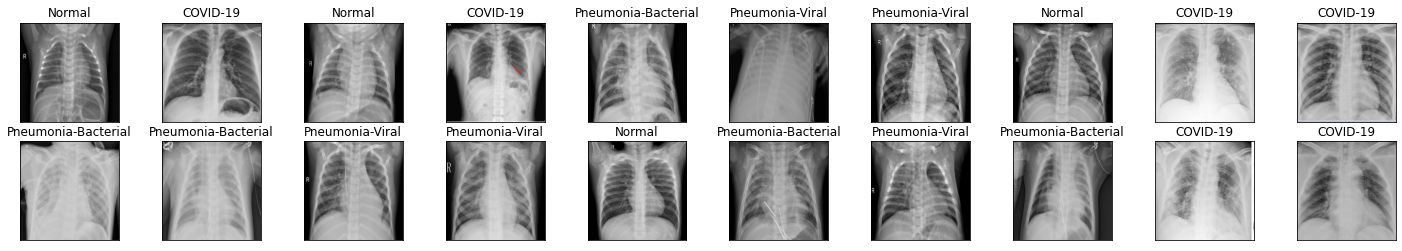

In [ ]:
k = 0
dataiter = iter(sample_loader)
images, labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for images, labels in sample_loader:
    
    ax = fig.add_subplot(2, 20/2, k+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[0], (1, 2, 0)))
    ax.set_title(classes[labels[0]])
    k += 1
    if k > 19:
        break

In [ ]:
def mirror_img(image):
  np.random.seed(1000) 
  img_flip = np.fliplr(image)
  return torch.from_numpy(img_flip.copy())

In [ ]:
dataiter = iter(sample_loader)
images, labels = dataiter.next()
image = np.transpose(images[0], (1, 2, 0))
label = classes[labels[0]]

In [ ]:
#img = np.array(Image.open(data_dir+'/COVID-19/COVID-19 (1).jpg'))
#img_flip = Image.fromarray(np.fliplr(img)).save(data_dir+'/Mirrored/covid19(1)_fliplr.jpg')
#new_img = np.array(Image.open(data_dir+'/Mirrored/covid19(1)_fliplr.jpg'))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


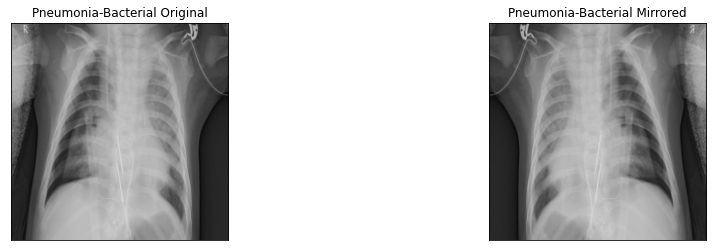

In [ ]:
fig = plt.figure(figsize=(50, 4))
ax = fig.add_subplot(1, 6, 1, xticks=[], yticks=[])
plt.imshow(image)
ax.set_title(label+' Original')
print(type(image))
ax = fig.add_subplot(1, 6, 2, xticks=[], yticks=[])
img = mirror_img(image)
plt.imshow(img)
ax.set_title(label+' Mirrored')
print(type(img))

In [ ]:
# Save the augmented images back into the folder 
def save_images(sample_loader):
  i = 0
  for images, labels in sample_loader:
      mirrored_img = mirror_img(images)
      new_dir = data_dir + '/' + str(classes[labels])
      torchvision.utils.save_image(mirrored_img[0], new_dir + '/' + str(classes[labels])+ '_Mirror_'+ str(i) + '.jpg')
      i += 1
      if i > 9:
        break

In [ ]:
save_images(sample_loader)